In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from matplotlib.ticker import FuncFormatter

from tmp.utils import formatter

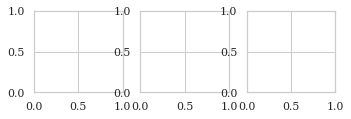

In [3]:
form = FuncFormatter(formatter)

plt.rc('font', family='serif')
plt.rc('text', usetex=False)
sns.set(style="whitegrid", font="serif")
color_mine = ["#F8414A", "#5676A1", "#FD878D", "#385A89",  "#FFFACD", "#EFCC00"]

df = pd.read_csv("../data/users_neighborhood_anon.csv")

f, axzs = plt.subplots(1, 3, figsize=(5.4, 1.5))
axzs = [axzs]
boxprops = dict(linewidth=0.3)
whiskerprops = dict(linewidth=0.3)
capprops = dict(linewidth=0.3)
medianprops = dict(linewidth=1)


In [4]:
attributes_all = [["sentiment", "subjectivity", "baddies"]]
titles_all = [["sentiment", "subjectivity", "bad words"]]

rects = None
first = True
for axs, attributes, titles in zip(axzs, attributes_all, titles_all):

    for axis, attribute, title in zip(axs, attributes, titles):
        N = 4
        men = [df[df.hate == "hateful"],
               df[df.hate == "normal"],
               df[df.hate_neigh],
               df[df.normal_neigh],
               df[df["is_63_2"] == True],
               df[df["is_63_2"] == False]]
        tmp = []
        medians, medians_ci = [], []
        averages, averages_ci = [], []

        for category, color in zip(men, color_mine):
            tmp.append(category[attribute].values)

        sns.boxplot(data=tmp, palette=color_mine, showfliers=False, ax=axis, orient="v", width=0.8, linewidth=.5)

        ind = np.array([0, 1, 2, 3])
        _, n_h = stats.ttest_ind(tmp[0], tmp[1], equal_var=False, nan_policy='omit')
        _, nn_nh = stats.ttest_ind(tmp[2], tmp[3], equal_var=False, nan_policy='omit')
        _, ns_ns2 = stats.ttest_ind(tmp[4], tmp[5], equal_var=False, nan_policy='omit')

        print(title)
        print(n_h)
        print(nn_nh)
        print(ns_ns2)

        axis.yaxis.set_major_formatter(form)

        axis.set_xticks([])
        axis.set_title(title)
        axis.set_ylabel("")
        axis.set_xlabel("")
        axis.axvline(1.5, ls='dashed', linewidth=0.3, color="#C0C0C0")
        axis.axvline(3.5, ls='dashed', linewidth=0.3, color="#C0C0C0")

        axzs[0][0].set_ylim(-.15, .4)
        axzs[0][1].set_ylim(.30, .70)
        axzs[0][2].set_ylim(-20, 100)

sentiment
8.077629958930836e-116
1.384e-320
2.3608932737804113e-82
subjectivity
5.470142656065715e-22
1.3509603788899121e-11
3.2218536565511764e-05
bad words
2.0536408750230293e-11
4.92386996268451e-37
7.195522891518388e-27


In [5]:
f.tight_layout(rect=[0, 0, 1, 1])
f.savefig("results/sentiment.pdf")